### Import required libraries and the data set

In [334]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import preprocessing
import math
import random
%matplotlib inline

### Import required libraries and the data set

In [284]:
# Import the dataset
data = pd.read_csv('Insurance data.csv')

### Analyse the dataset 

In [285]:
# Check teh dimensionality
data.shape

(1338, 7)

In [286]:
# So we get the number number of rows(observations) as 1338 and the number of columns(variables) as 7
# Check a sample of the data 
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [287]:
# Find if any values are missing or null or in an incorrect data type.
# We use info() for this. 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [288]:
# We find that there are 7 variables and 1338 observations and none of the columns in any observation are missing or null,
# because each column has 1338 non-null values
# It seems that sex,region and smokers are objects(i.e categorical) while the remaining comlumns are numerical. 
# The columns of type object should be categorical unless the numerical fields have some values(s) of a different data-type,
# in which case they'll be termed as columns of type object too.
# We can check the counts for each category of the columns of type object (here sex,region,smokers) 
# to ensure that there aren't any numerical values shown as object. (Though in our case none of the 3 columns ) 
# This is done using value_counts()
data['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [289]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [290]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [291]:
# We can see here, that all the object type columns 
# are indeed categorical (male/female, southeast/northwest/southwest/northeast and yes/no) 
# Now that we know that our dataset doesn't have missing values,null values or values with wrong data-types, 
# lets look at the statistical summary of the numerical data
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [292]:
# Here the count, mean, std, min and max show 
# the number of values, average value, the standard deviation, minimum value and maximum value of each column respectively
# 25%, 50%,75% show the 25th percentile(1st quartile), 50th percentile(median/2nd quaritle) and the 75th percentile(3rd quartile) respectively
# This means that 25% of the values in age column are < 27, 50% are < 39 etc.

### Visualize the given data set and select the Features

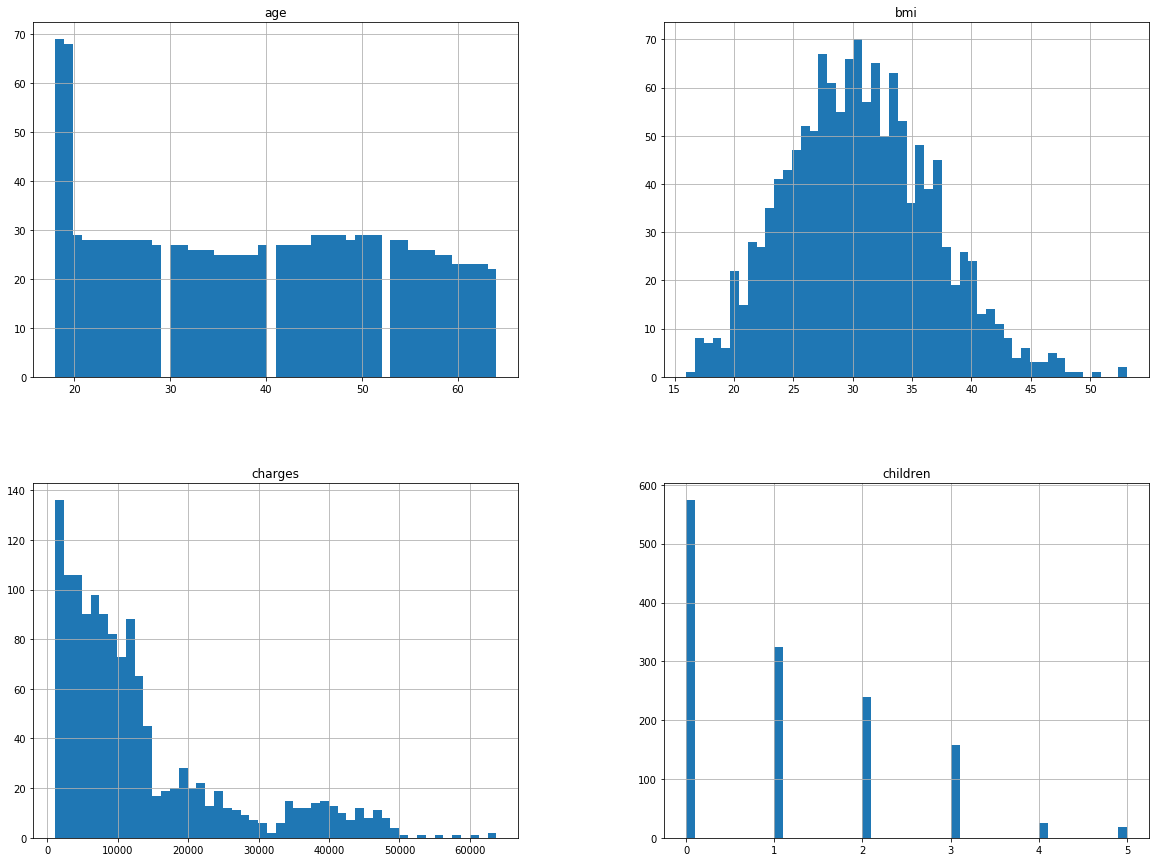

In [293]:
# Now lets plot histograms to get a visual understanding of the correlations of the variables
data.hist(bins=50,figsize=(20,15))
plt.show()

In [294]:
# This histogram shows the frequency of each of the numerical parameters
# We can see that most of the data in the charges graph is towards the left. 
# Another thing that we can see is that in the charges, children and age graph there is a peak at the begining. One thing we 
# understand from this is that the number of people with 0 children, number of people under the age of 20 
# and the number of people whose charges are under 10000 are the highest.

In [295]:
# Now lets plot the scatter plot to see relation between the independent variables and the response variable
age = data.iloc[:,0].values
sex = data.iloc[:,1].values
bmi = data.iloc[:,2].values
children = data.iloc[:,3].values
smoker = data.iloc[:,4].values
region = data.iloc[:,5].values
charges = data.iloc[:,6].values


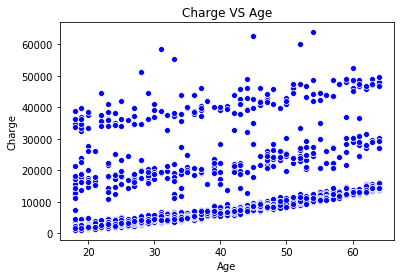

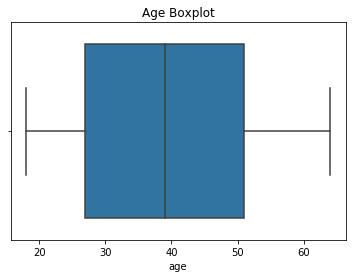

In [296]:
ax = sns.scatterplot(age, charges, color='blue')
ax.set_title('Charge VS Age')
plt.xlabel('Age')
plt.ylabel('Charge')
plt.show()

ax = sns.boxplot(data['age'])
ax.set_title(('Age Boxplot'))
plt.show(ax)


In [297]:
# From the scatter plot we can see that with age the charge is also increasing but the data is divided into three distinct groups.
# Yet all of these groups follow similar curve on their own(disregarding the outliers). 
# This indicates that the attribute(variable) based on which the Age vs Charge plot is grouped is not influencing the charge
# much. Lets plot age against the other variables to see which variable this is.

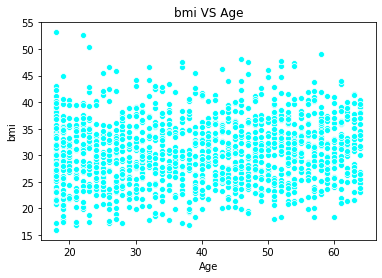

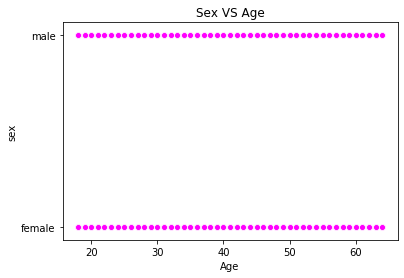

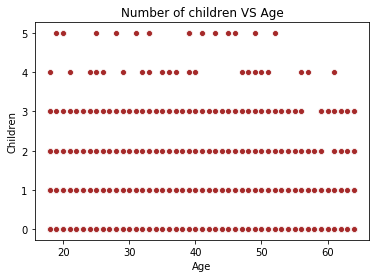

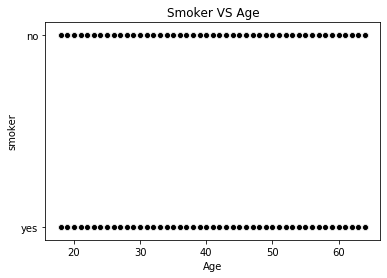

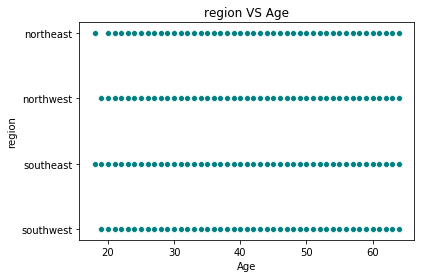

In [298]:
ax = sns.scatterplot(age, bmi, color='aqua')
ax.set_title('bmi VS Age')
plt.xlabel('Age')
plt.ylabel('bmi')
plt.show()

ax = sns.scatterplot(age, sex, color='magenta')
ax.set_title('Sex VS Age')
plt.xlabel('Age')
plt.ylabel('sex')
plt.show()

ax = sns.scatterplot(age, children, color='brown')
ax.set_title('Number of children VS Age')
plt.xlabel('Age')
plt.ylabel('Children')
plt.show()

ax = sns.scatterplot(age, smoker, color='black')
ax.set_title('Smoker VS Age')
plt.xlabel('Age')
plt.ylabel('smoker')
plt.show()


ax = sns.scatterplot(age, region, color='teal')
ax.set_title('region VS Age')
plt.xlabel('Age')
plt.ylabel('region')
plt.show()


In [299]:
# From the charts above we can see that the variable is number of children. So it is likely that the number of children
# plays a smaller role in determining the charge.   

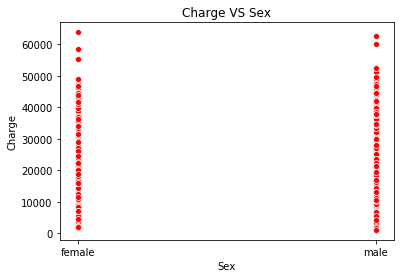

In [300]:
ax = sns.scatterplot(sex, charges, color='red')
ax.set_title('Charge VS Sex')
plt.xlabel('Sex')
plt.ylabel('Charge')
plt.show()


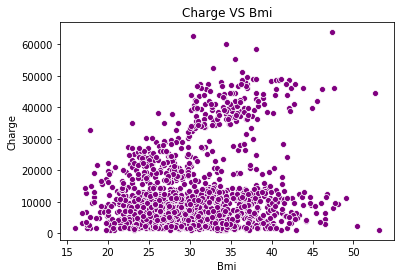

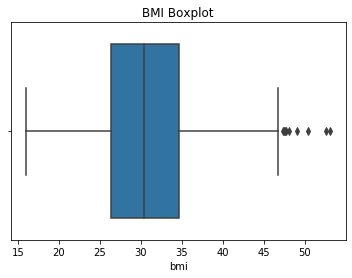

In [301]:

ax = sns.scatterplot(bmi, charges, color='purple')
ax.set_title('Charge VS Bmi')
plt.xlabel('Bmi')
plt.ylabel('Charge')
plt.show()

ax = sns.boxplot(data['bmi'])
ax.set_title(('BMI Boxplot'))
plt.show(ax)


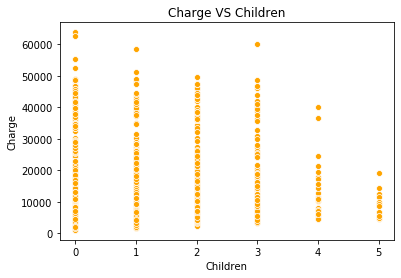

In [302]:
ax = sns.scatterplot(children, charges, color='orange')
ax.set_title('Charge VS Children')
plt.xlabel('Children')
plt.ylabel('Charge')
plt.show()


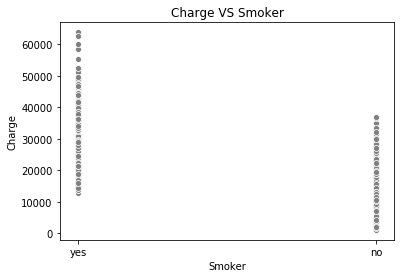

In [303]:
ax = sns.scatterplot(smoker, charges, color='grey')
ax.set_title('Charge VS Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charge')
plt.show()


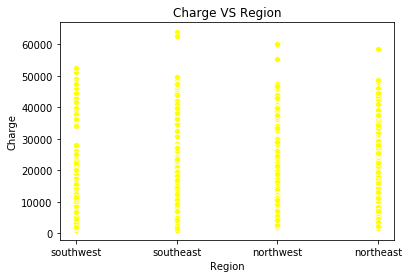

In [304]:
ax = sns.scatterplot(region, charges, color='yellow')
ax.set_title('Charge VS Region')
plt.xlabel('Region')
plt.ylabel('Charge')
plt.show() 

In [305]:
# Some conclusions we can arrive at just by looking at the plots are as follows:-
# > The charges follow a similar distribution for both sexes(implying less dependence and a lower weight).
# > The min charge for non smokers is lesser than the min charge for smokers and similarly 
# the max charge for smokers is more than non smokers.
# > Charges are generally increasing with increase in age
# > The mean charges for different regions is similar(implying less dependence and a lower weight).

In [306]:
# Lets check which of the variables show the highest corelation with the response variable charges
# This can be done using corr()
corr_matrix = data.corr()
corr_matrix['charges'].sort_values(ascending=False)

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64

In [307]:
# Here we can see the variables in the descending order of their corelation with the response variable charges
# Since the variable charges is 100% corelated with itself the value for charges is 1. Further we can see that the next
# variable with the highest corelation is smoker, followed by age and so on. 
# It's also apparent that region and the sex have the least corelation with the charges
# So we can choose the most influential variables as our features. These are smoker, age and BMI

In [308]:
# lets encode the categorical value smoker so it is easier to work with.
# First we'll create a dictionary giving a token value to each of the categories 1 for smoker and 0 for non smoker.
# Then we'll replace the object type values with the corresponding numerical value using the dictionary 

encode_dict = {"smoker": {"no": 0,"yes": 1}}

data = data.replace(encode_dict)
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520


### Create and train the machine learning model using Normal SK-Learn library

In [309]:
# Since our features are smoker, age and BMI, lets put them in X and we'll put charges in Y.

X = data.iloc[:,[True,False,True,False,True,False,False]].values # copy all feature columns using a boolean array
Y = data.iloc[:,-1].values # copy the response variable column 

# Now we split the data into training and testing data 
# View the size of the arrays X and Y
print(X.shape)
print(Y.shape)
print(X[0])
print(Y[0])

(1338, 3)
(1338,)
[19.  27.9  1. ]
16884.924


In [310]:
# Split the dataset into the Training set and Test set in the ratio of 2:1 i.e 1070 for training and 268 for testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=0)

In [311]:
train.head()

,age,sex,bmi,children,smoker,region,charges
482,18,1,31.35,0,0,0,1622.1885
338,50,0,32.30,1,1,3,41919.0970
356,46,0,43.89,3,0,0,8944.1151
869,25,1,24.30,3,0,2,4391.6520
182,22,0,19.95,3,0,3,4005.4225


In [312]:
# Fit Simple Linear Regression to the Training dataset
model = LinearRegression()

# Train the model, using training data set
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

###  Model Coefficients

In [313]:
# print theta0
print('Intercept θ0 = ', model.intercept_)
#print theta1
print('Coefficient θ1 = ', model.coef_[0])
# print theta2
print('Coefficient θ2 = ', model.coef_[1])
# print theta3
print('Coefficient θ3 = ', model.coef_[2])


Intercept θ0 =  -11611.24339642364
Coefficient θ1 =  263.1061895378838
Coefficient θ2 =  316.39293702528414
Coefficient θ3 =  23273.50024446497


In [314]:
print('Bias, θ0 = ', model.intercept_)
print('Weight of Age, θ1 = ', model.coef_[0])
print('Weight of BMI, θ2 = ', model.coef_[1])
print('Weight of Smoker, θ3 = ', model.coef_[2])

Bias, θ0 =  -11611.24339642364
Weight of Age, θ1 =  263.1061895378838
Weight of BMI, θ2 =  316.39293702528414
Weight of Smoker, θ3 =  23273.50024446497


### Model Evaluation

In [315]:
# The mean squared error
#Mean squared error regression loss

# Use trained model to predict on test dataset
Y_predict = model.predict(X_test)

print("Mean Squared Error = %0.2f" % mean_squared_error(Y_test, Y_predict))

print("Root Mean Squared Error = %0.2f" % math.sqrt(mean_squared_error(Y_test, Y_predict)))

# variance score: 1 is perfect prediction while a constant model that always predicts the expected value of y, disregarding the input features, 
# would get a R^2 score of 0.0.
print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean Squared Error = 34330795.41
Root Mean Squared Error = 5859.25
Variance score = 0.79


### Create and train the machine learning model using Batch Gradient Descent

In [316]:
# Scale X and Y (X has the features Smoker,Age and BMI and Y is the response variable)
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = X
scaled_X = sx.fit_transform(scaled_X)
scaled_y = Y.reshape(-1,1)
scaled_y = sy.fit_transform(scaled_y)

# Define the function for Batch Gradient Descent with arguments X, y_true, epochs and learning parameter eta(fixed at 0.01 here)
def batch_gradient_descent(X, y_true, epochs, eta = 0.01):

#     Get the number of features from the size of X     
    number_of_features = X.shape[1]
    
#     Initialize the weights with 1 (can take anything)
    w = np.ones(shape=(number_of_features))
    
#     Initialize the Bias
    b = 0
    
#     Get the count of total samples(observations)
    total_samples = X.shape[0]
    
#     declare arays
    cost_list = []
    epoch_list = []
    
#     Loop through each epoch
    for i in range(epochs):
#         Get y_predicted by multiplying the weights with X and adding the bias
        y_predicted = np.dot(w, scaled_X.T)
#         Find partial derivatives wrt each w
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*np.sum(y_true-y_predicted)
        
#         adjust the weights and bias
        w = w - eta * w_grad
        b = b - eta * b_grad
        
#         calculate the cost = mean of square of the difference between y_true and y_predicted
        cost = np.mean(np.square(y_true - y_predicted))
        
#         store the cost and epoch value at few of the iterations (every 10th)
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
#     return the function with weights, bias, cost, cost_list, and epoch list 
    return w, b, cost, cost_list, epoch_list

# call the function
w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_X,scaled_y.reshape(scaled_y.shape[0],),500)


# print weights, bias and the cost
print('Bias, θ0 = ', b)
print('Weight of Age, θ1 = ', w[0])
print('Weight of BMI, θ2 = ', w[1])
print('Weight of Smoker, θ3 = ', w[2])
print('cost = ', cost)

        

Bias, θ0 =  -1.8285597931446875
Weight of Age, θ1 =  0.09320791935373798
Weight of BMI, θ2 =  0.22050513209863298
Weight of Smoker, θ3 =  0.3905320628448907
cost =  0.010594696658614055


### Visualize the cost value over epochs

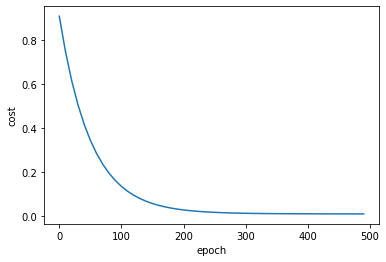

In [317]:

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

### Create the Prediction Function

In [345]:
def predict(age,bmi,smoker,w,b):
#     scale using the previously defined scale
    scaled_X = sx.transform([[age,bmi,smoker]])[0]
    
#     get the scaled price by subtituting the scaled_X values
    scaled_charge = w[0]*scaled_X[0] + w[1]*scaled_X[1] + w[2]*scaled_X[2] + b 
    
#     inverse trnform to return the actual charge back from the scaled value 
    return sy.inverse_transform([[scaled_charge]])
predict(30,32.4,1,w,b)
    

array([[30750.63988434]])

### Create and train the machine learning model using Stochastic Gradient Descent

In [326]:
# Fit Stochastic Gradient Descent to the Training dataset
model_SGD = SGDRegressor()

# Train the model, using training data set
model_SGD.fit(X_train, Y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

### Model Coefficients

In [327]:
# print theta0
print('Intercept θ0 = ', model_SGD.intercept_)
#print theta1
print('Coefficient θ1 = ', model_SGD.coef_[0])
# print theta2
print('Coefficient θ2 = ', model_SGD.coef_[1])
# print theta3
print('Coefficient θ3 = ', model_SGD.coef_[2])


Intercept θ0 =  [-7.12125925e+09]
Coefficient θ1 =  18441020.060451247
Coefficient θ2 =  220005816.8167388
Coefficient θ3 =  4804609049.491953


In [329]:
print('Bias, θ0 = ', model_SGD.intercept_)
print('Weight of Age, θ1 = ', model_SGD.coef_[0])
print('Weight of BMI, θ2 = ', model_SGD.coef_[1])
print('Weight of Smoker, θ3 = ', model_SGD.coef_[2])

Bias, θ0 =  [-7.12125925e+09]
Weight of Age, θ1 =  18441020.060451247
Weight of BMI, θ2 =  220005816.8167388
Weight of Smoker, θ3 =  4804609049.491953


### Model Evaluation

In [330]:
# The mean squared error
#Mean squared error regression loss

# Use trained model to predict on test dataset
Y_predict = model_SGD.predict(X_test)

print("Mean Squared Error = %0.2f" % mean_squared_error(Y_test, Y_predict))

print("Root Mean Squared Error = %0.2f" % math.sqrt(mean_squared_error(Y_test, Y_predict)))

# variance score: 1 is perfect prediction while a constant model that always predicts the expected value of y, disregarding the input features, 
# would get a R^2 score of 0.0.
print('Variance score = %.2f' % r2_score(Y_test, Y_predict))

Mean Squared Error = 8012677508935783424.00
Root Mean Squared Error = 2830667325.73
Variance score = -49974537565.58


### Create and train the machine learning model using Mini Batch Gradient Descent

In [342]:
# Scale X and Y (X has the features Smoker,Age and BMI and Y is the response variable)
sx = preprocessing.MinMaxScaler()
sy = preprocessing.MinMaxScaler()

scaled_X = X
scaled_X = sx.fit_transform(scaled_X)
scaled_y = Y.reshape(-1,1)
scaled_y = sy.fit_transform(scaled_y)

# scaling makes it 2d. Reshape into 1d
scaled_y.reshape(1338,)

# Define the function for Batch Gradient Descent with arguments X, y_true, epochs and learning parameter eta(fixed at 0.01 here)
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, eta = 0.01):

#     Get the number of features from the size of X     
    number_of_features = X.shape[1]
    
#     Initialize the weights with 1 (can take anything)
    w = np.ones(shape=(number_of_features))
    
#     Initialize the Bias
    b = 0
    
#     Get the count of total samples(observations)
    total_samples = X.shape[0]
    
#     declare arays
    cost_list = []
    epoch_list = []
    
#     get the count of batches by dividing total samples by batch_size 
    num_batches = int(total_samples/batch_size)
    
#     Loop through each epoch
    for i in range(epochs):
        
#         get random permutations of totl samples and pick values of X and Y_true from it 
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            
#         Get y_predicted by multiplying the weights with X and adding the bias
            y_predicted = np.dot(w, Xj.T) + b
            
#         Find partial derivatives wrt each w
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
#         adjust the weights and bias
            w = w - eta * w_grad
            b = b - eta * b_grad
                
#         calculate the cost = mean of square of the difference between y_true and y_predicted
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
#         store the cost and epoch value at few of the iterations (every 10th)v
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
        
#     return the function with weights, bias, cost, cost_list, and epoch list
    return w, b, cost, cost_list, epoch_list
        
# call the function
w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(scaled_X, scaled_y.reshape(scaled_y.shape[0],), epochs = 120, batch_size = 5)
w, b, cost

# print weights, bias and the cost
print('Bias, θ0 = ', b)
print('Weight of Age, θ1 = ', w[0])
print('Weight of BMI, θ2 = ', w[1])
print('Weight of Smoker, θ3 = ', w[2])
print('cost = ', cost)

        

Bias, θ0 =  -0.04351989554634273
Weight of Age, θ1 =  0.19174694275123116
Weight of BMI, θ2 =  0.19368438319651152
Weight of Smoker, θ3 =  0.3807700176136405
cost =  0.07899008608129875


### Visualize the cost value over epochs

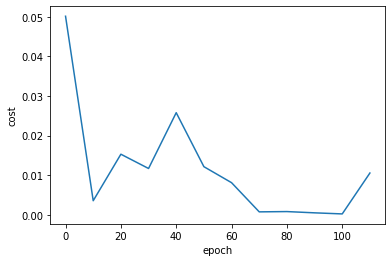

In [343]:

plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list,cost_list)

### Create the Prediction Function

In [344]:
def predict(age,bmi,smoker,w,b):
#     scale using the previously defined scale
    scaled_X = sx.transform([[age,bmi,smoker]])[0]
    
#     get the scaled price by subtituting the scaled_X values
    scaled_charge = w[0]*scaled_X[0] + w[1]*scaled_X[1] + w[2]*scaled_X[2] + b 
    
#     inverse trnform to return the actual charge back from the scaled value 
    return sy.inverse_transform([[scaled_charge]])
predict(23,34.4,0,w,b)
    

array([[5720.82865003]])